In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')



Column Profiling:

    datetime: datetime
    season: season (1: spring, 2: summer, 3: fall, 4: winter)
    holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
    weather:
    1: Clear, Few clouds, partly cloudy, partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    temp: temperature in Celsius
    atemp: feeling temperature in Celsius
    humidity: humidity
    windspeed: wind speed
    casual: count of casual users
    registered: count of registered users
    count: count of total rental bikes including both casual and registered



In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

No null values in data

In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Convert datetime coloumn from object to datetime

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

      changing the seasons to
      # 1: spring, 2: summer, 3: fall, 4: winter

In [ ]:
def season_category(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
df['season'] = df['season'].apply(season_category)

In [ ]:
df['season'] = df['season'].astype('category')

In [ ]:
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [ ]:
df['holiday'] = df['holiday'].astype('category')

In [ ]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [ ]:
df['workingday'] = df['workingday'].astype('category')

In [ ]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [ ]:
df['weather'] = df['weather'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [ ]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


These statistics provide insights into the central tendency, spread, and range of the numerical features in the dataset.


In [ ]:
np.round(df['season'].value_counts(normalize = True) * 100, 2)

season
winter    25.11
fall      25.11
summer    25.11
spring    24.67
Name: proportion, dtype: float64

In [ ]:
np.round(df['holiday'].value_counts(normalize = True) * 100, 2)

holiday
0    97.14
1     2.86
Name: proportion, dtype: float64

In [ ]:
np.round(df['workingday'].value_counts(normalize = True) * 100, 2)

workingday
1    68.09
0    31.91
Name: proportion, dtype: float64

In [ ]:
np.round(df['weather'].value_counts(normalize = True) * 100, 2)

weather
1    66.07
2    26.03
3     7.89
4     0.01
Name: proportion, dtype: float64

Univariate Analysis

<ipython-input-37-58aa1df5954e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'season',palette="muted")


[]

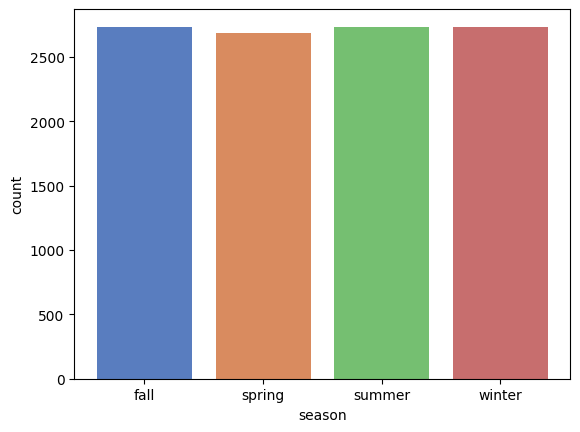

In [ ]:
# The below code generates a visually appealing count plot to showcase the
    # distribution of season in the dataset
sns.countplot(data = df, x = 'season',palette="muted")
plt.plot()   # displaying the plot

<ipython-input-38-305bdf574cac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'holiday',palette="muted")


[]

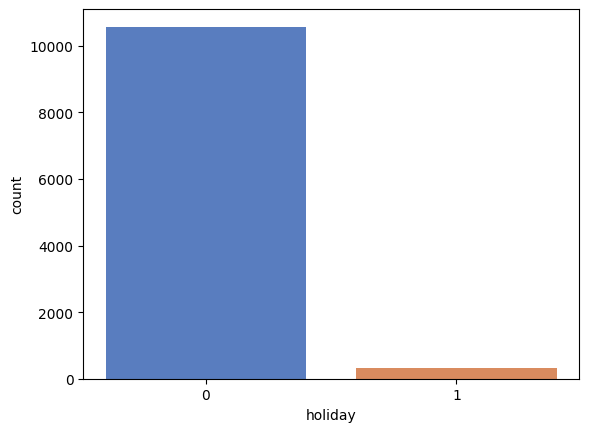

In [ ]:
# The below code generates a visually appealing count plot to showcase the
    # distribution of holiday in the dataset

sns.countplot(data = df, x = 'holiday',palette="muted")
plt.plot()       # displaying the chart

<ipython-input-39-41998fa7c51c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'workingday',palette="muted")


[]

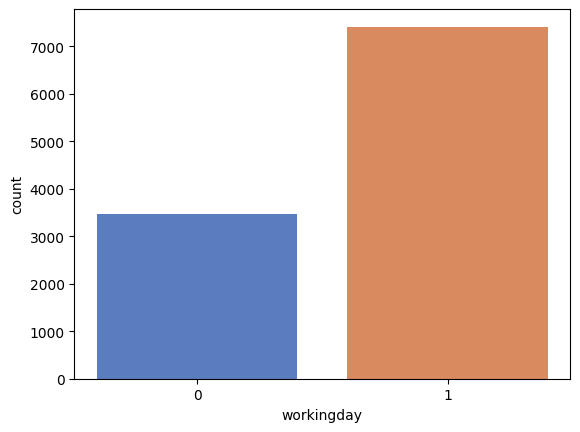

In [ ]:
# The below code generates a visually appealing count plot to showcase the
    # distribution of workingday in the dataset

sns.countplot(data = df, x = 'workingday',palette="muted")
plt.plot()      # displaying the chart

<ipython-input-40-8e6867ff8527>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'weather',palette="muted")


[]

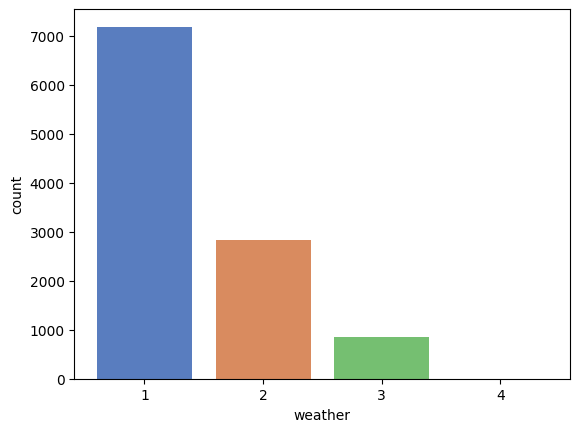

In [ ]:
# The below code generates a visually appealing count plot to showcase the
    # distribution of weather in the dataset

sns.countplot(data = df, x = 'weather',palette="muted")
plt.plot()        # displaying the chart

[]

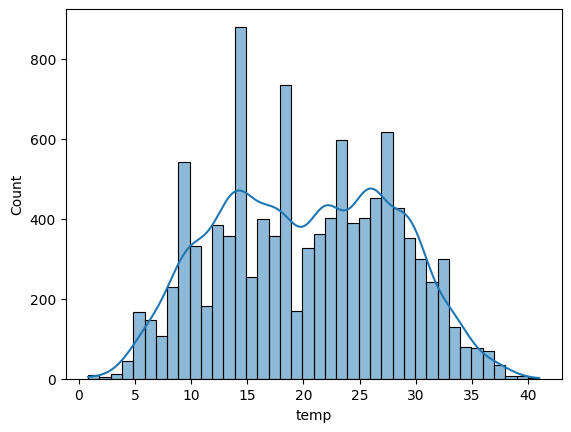

In [ ]:
 # The below code generates a histogram plot for the 'temp' feature, showing the distribution of
    # temperature values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'temp', kde = True, bins = 40)
plt.plot()        # displaying the chart

In [ ]:
temp_mean = np.round(df['temp'].mean(), 2)
temp_std = np.round(df['temp'].std(), 2)
temp_mean, temp_std

(20.23, 7.79)

The mean and the standard deviation of the temp column is 20.23 and 7.79 degree celcius respectively.

[]

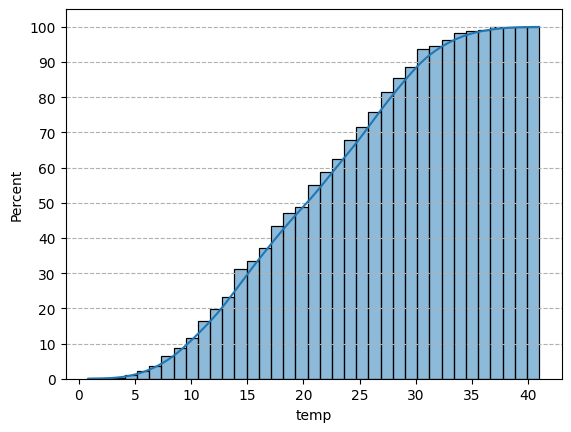

In [ ]:
# The below code generates a histogram plot for the 'temp' feature, showing the cumulative
    # distribution of temperature values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'temp', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()          # displaying the chart

More than 80 % of the time, the temperature is less than 28 degrees celcius

[]

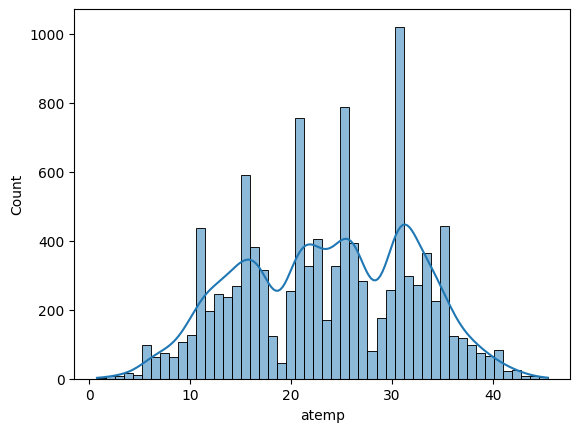

In [ ]:
# The below code generates a histogram plot for the 'atemp' feature, showing the distribution of
    # feeling temperature values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'atemp', kde = True, bins = 50)
plt.plot()         # displaying the chart


In [ ]:
temp_mean = np.round(df['atemp'].mean(), 2)
temp_std = np.round(df['atemp'].std(), 2)
temp_mean, temp_std

(23.66, 8.47)

The mean and the standard deviation of the atemp column is 23.66 and 8.47 degree celcius respectively.

[]

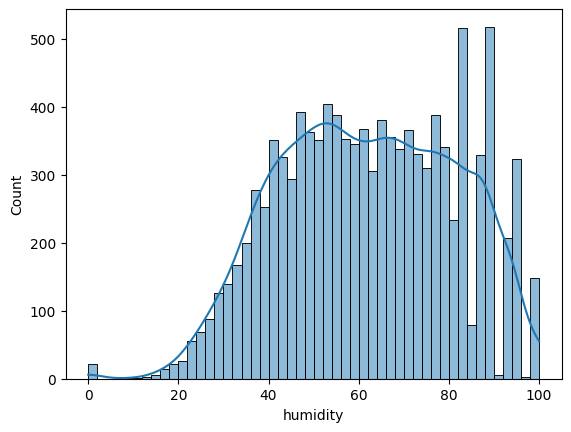

In [ ]:
# The below code generates a histogram plot for the 'humidity' feature, showing the distribution of
    # humidity values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'humidity', kde = True, bins = 50)
plt.plot()       # displaying the chart

In [ ]:
humidity_mean = np.round(df['humidity'].mean(), 2)
humidity_std = np.round(df['humidity'].std(), 2)
humidity_mean, humidity_std

(61.89, 19.25)

The mean and the standard deviation of the humidity column is 61.89 and 19.25 respectively.

[]

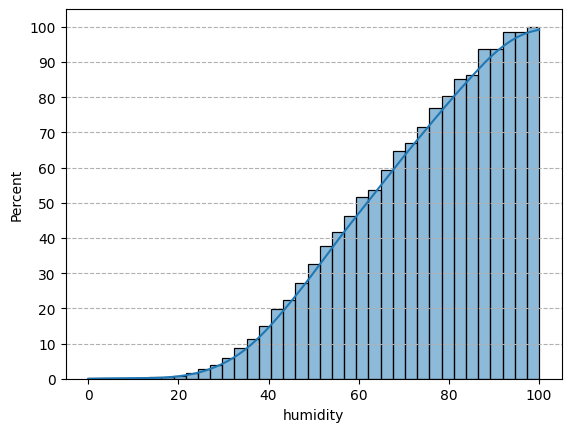

In [ ]:
# The below code generates a histogram plot for the 'humidity' feature, showing the cumulative
    # distribution of humidity values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'humidity', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')    # setting the gridlines along y axis
plt.yticks(np.arange(0, 101, 10))
plt.plot()       # displaying the chart

More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.

[]

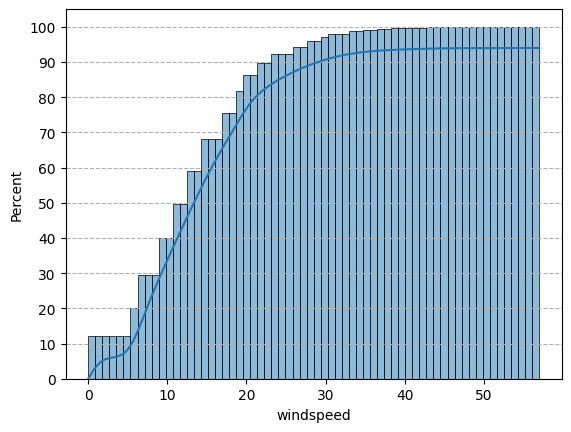

In [ ]:
sns.histplot(data = df, x = 'windspeed', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()       # displaying the chart

        More than 85 % of the total windspeed data has a value of less than 20.

[]

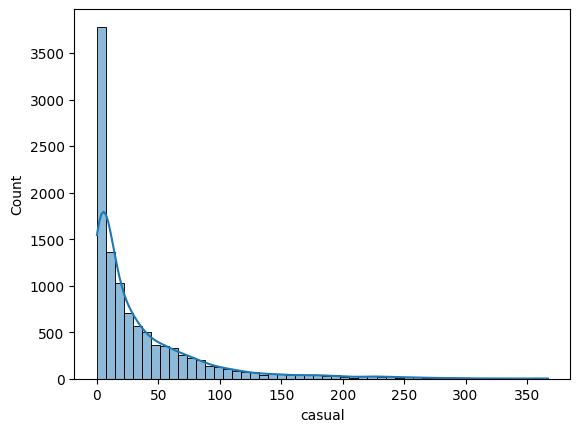

In [ ]:
# The below code generates a histogram plot for the 'casual' feature, showing the distribution of
    # casual users' values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'casual', kde = True, bins = 50)
plt.plot()      # displaying the chart

[]

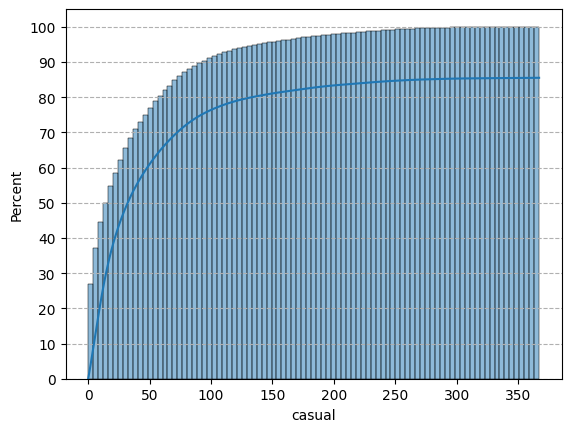

In [ ]:
sns.histplot(data = df, x = 'casual', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()        # displaying the chart

More than 80 % of the time, the count of casual users is less than 60.

[]

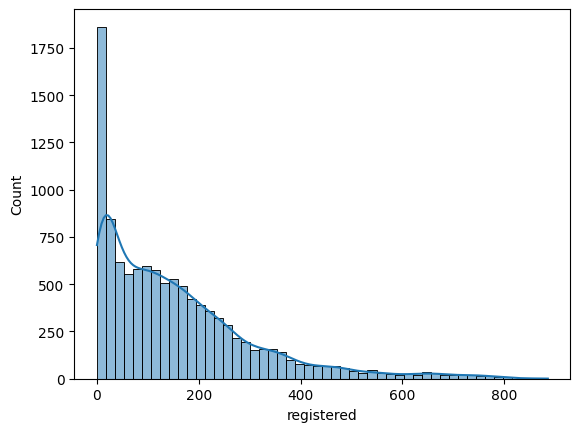

In [ ]:
# The below code generates a histogram plot for the 'registered' feature, showing the distribution of
    # registered users' values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'registered', kde = True, bins = 50)
plt.plot()          # displaying the chart

[]

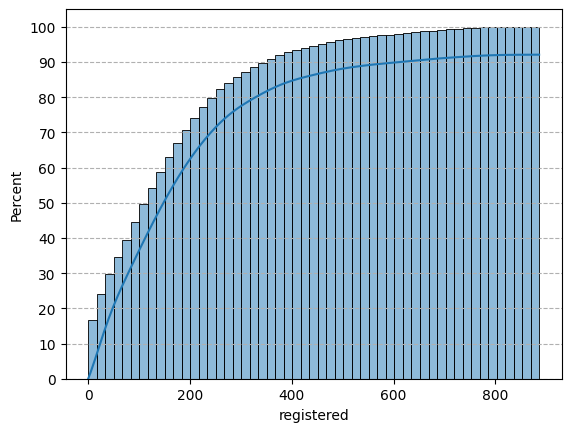

In [ ]:
sns.histplot(data = df, x = 'registered', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()        # displaying the chart

More than 85 % of the time, the count of registered users is less than 300.

Outliers

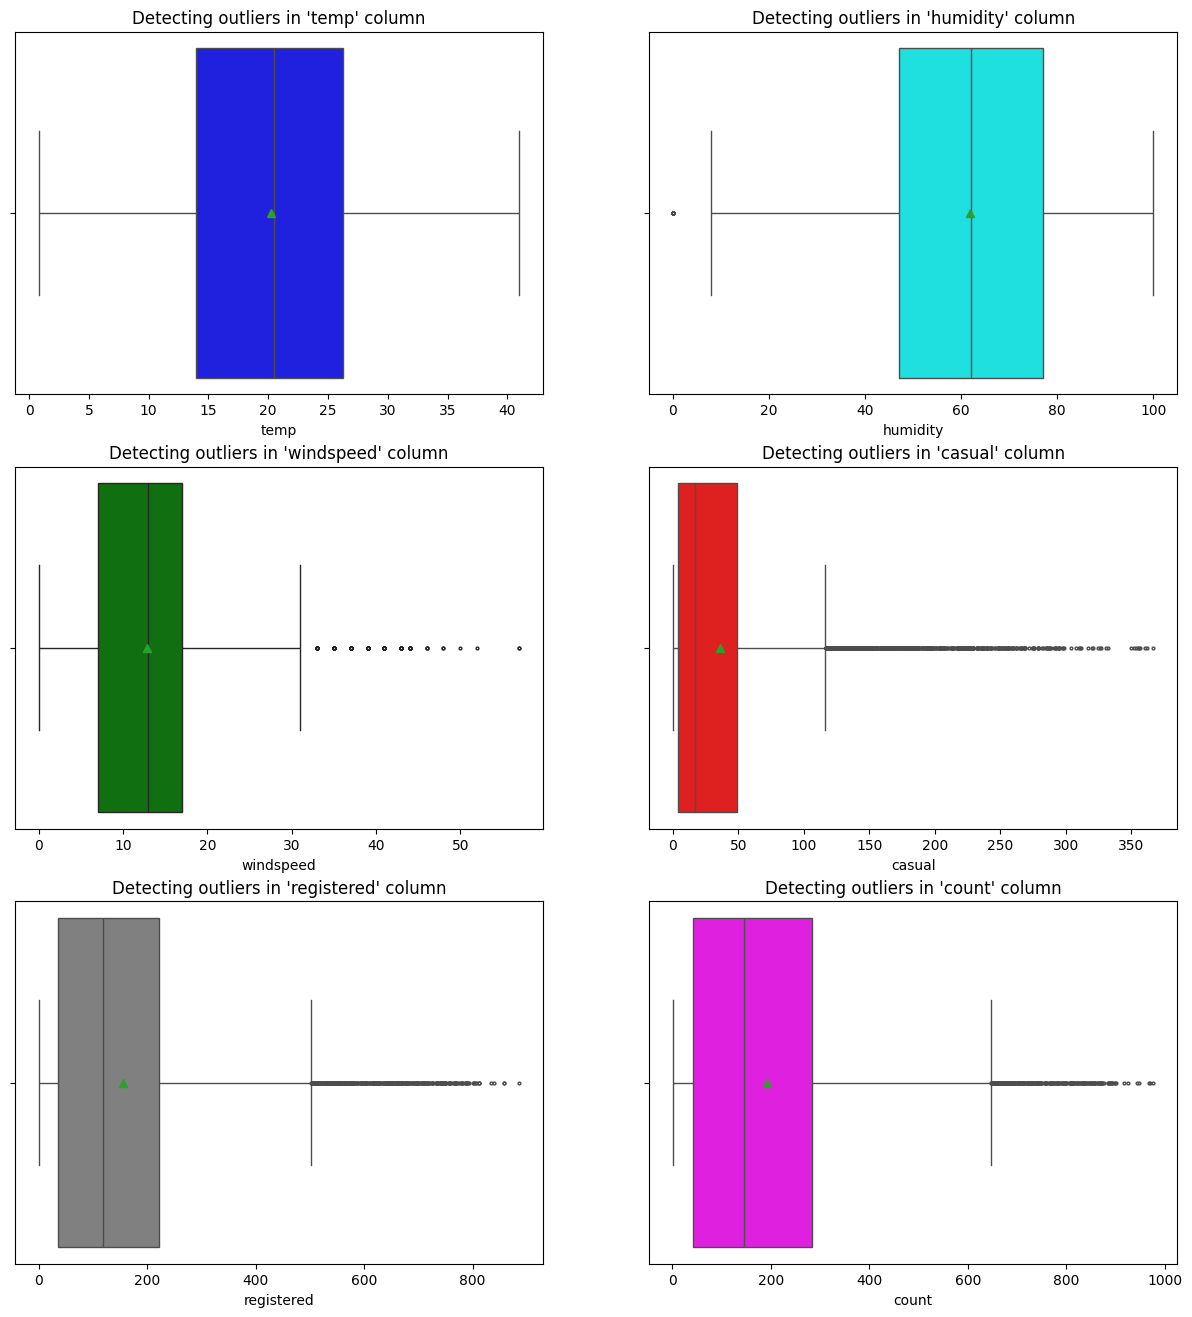

In [ ]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'cyan', 'gray'])
count = 1
plt.figure(figsize = (15, 16))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df, x = df[i], color = colors[count - 1], showmeans = True, fliersize = 2)
    plt.plot()
    count += 1



    There is no outlier in the temp column.
    There are few outliers present in humidity column.
    There are many outliers present in each of the columns : windspeed, casual, registered, count.



Bivariate Analysis

[]

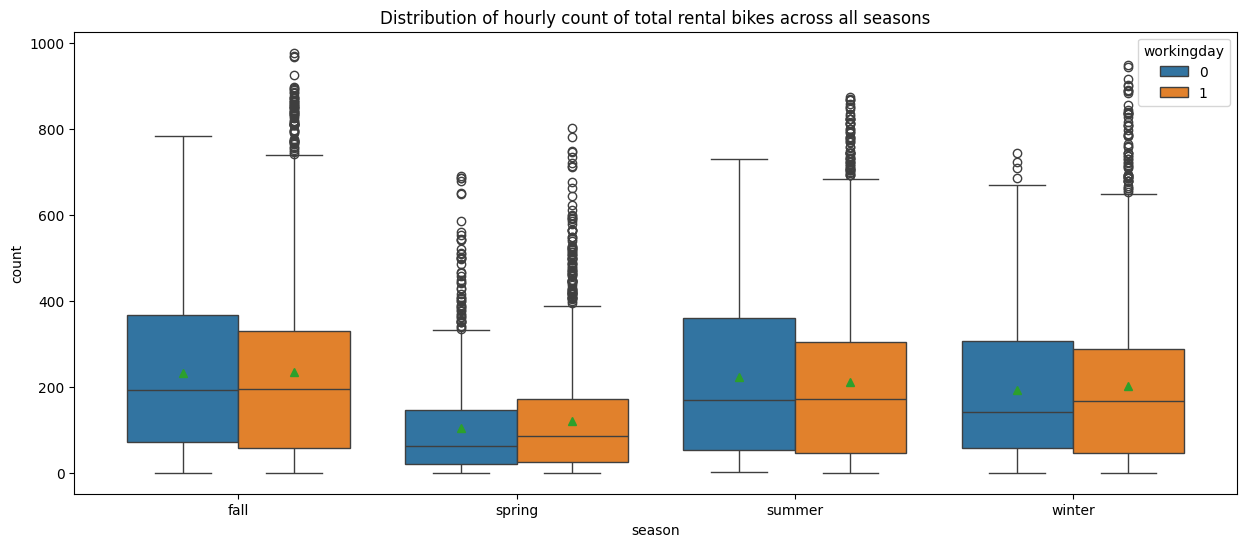

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons')
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)

plt.plot()

The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

[]

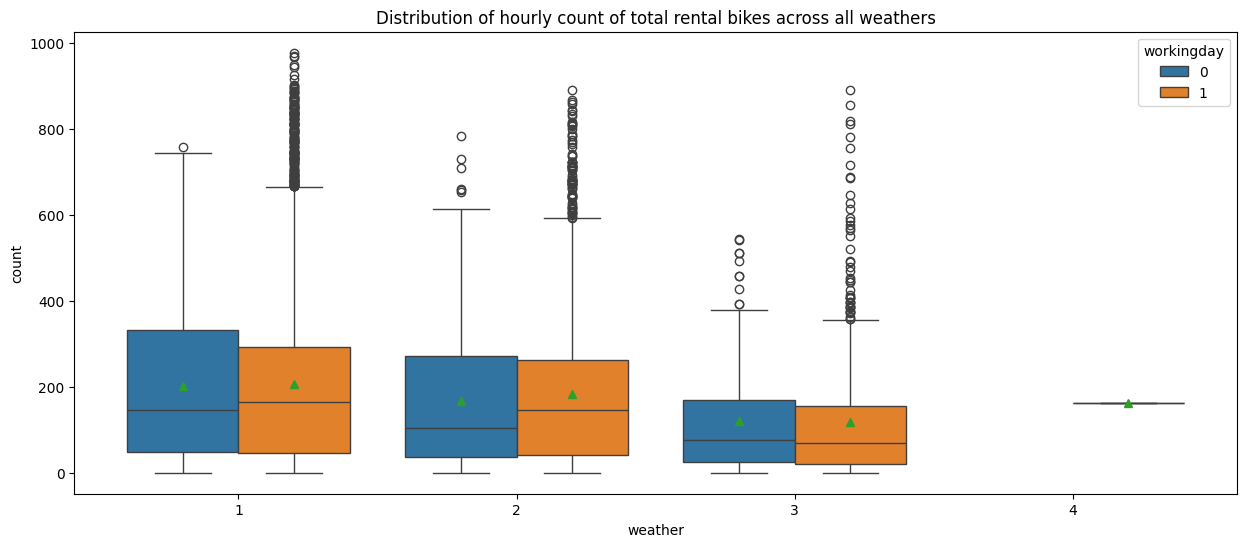

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all weathers',)
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday', showmeans = True)
plt.plot()

The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

Is there any effect of Working Day on the number of electric cycles rented ?

In [ ]:
df.groupby(by = 'workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


<ipython-input-62-0739a29ee82b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'workingday', y = 'count', palette='muted')


[]

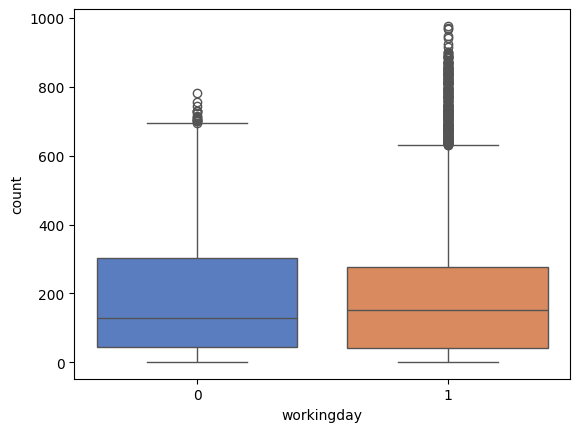

In [ ]:
sns.boxplot(data = df, x = 'workingday', y = 'count', palette='muted')
plt.plot()

    Step 1: Set up Null Hypothesis (H0)



    Null Hypothesis ( H0 ) - Working Day does not have any effect on the number of electric cycles rented.

    Alternate Hypothesis ( HA ) - Working Day has some effect on the number of electric cycles rented
    
    STEP-2 : Checking for basic assumpitons for the hypothesis

    Distribution check using QQ Plot
    Homogeneity of Variances using Levene's test

    STEP-3: Define Test statistics; Distribution of T under H0.


    If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

    STEP-4: Compute the p-value and fix value of alpha.


    We set our alpha to be 0.05

    STEP-5: Compare p-value and alpha.

    Based on p-value, we will accept or reject H0.
        p-val > alpha : Accept H0
        p-val < alpha : Reject H0



[]

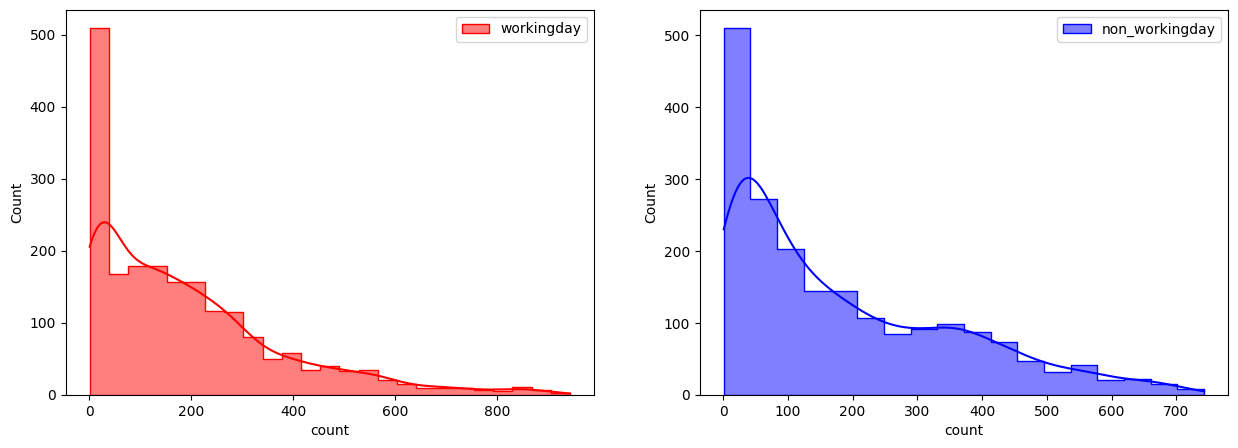

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'].sample(2000),
             element = 'step', color = 'red', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'].sample(2000),
             element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.

Distribution check using QQ Plot

[]

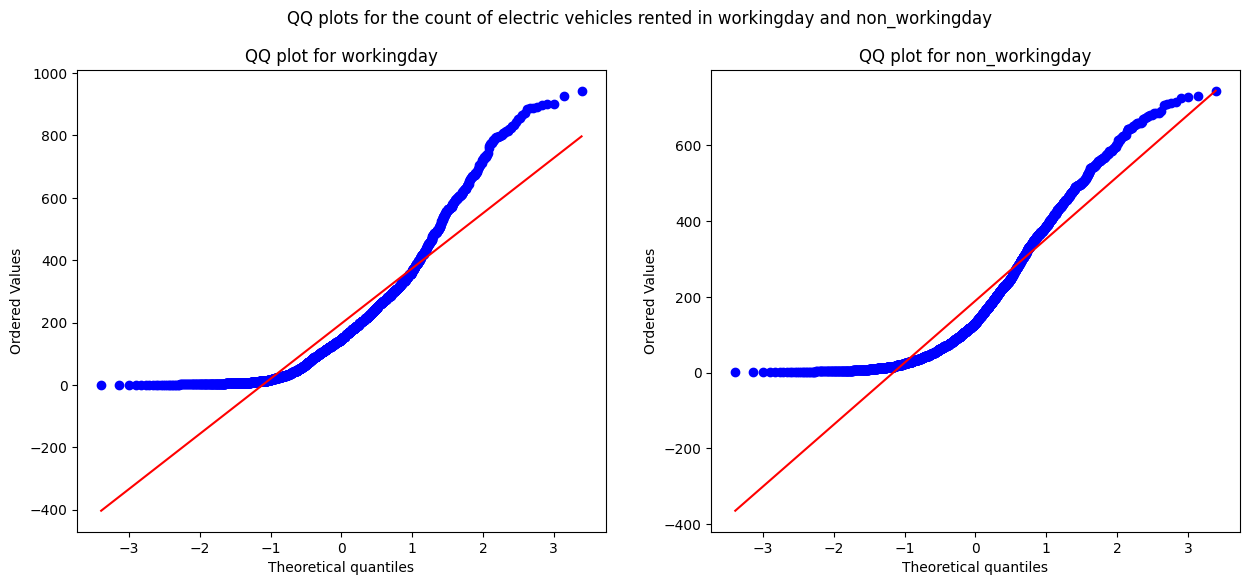

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday')
spy.probplot(df.loc[df['workingday'] == 1, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for workingday')
plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['workingday'] == 0, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for non_workingday')
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.


It can be seen from the above plots that the samples do not come from normal distribution.

    Applying Shapiro-Wilk test for normality

H0: The sample follows normal distribution

H1: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 1, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.6742025466874607e-38
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')


p-value 1.4971876366804071e-36
The sample does not follow normal distribution


Homogeneity of Variances using Lavene's test


In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df.loc[df['workingday'] == 1, 'count'].sample(2000),
                                df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.0366859907117809
The samples do not have  Homogenous Variance


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [ ]:
# Ho : Mean no.of electric cycles rented is same for working and non-working days
# Ha : Mean no.of electric cycles rented is not same for working and non-working days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = spy.mannwhitneyu(df.loc[df['workingday'] == 1, 'count'],
                                      df.loc[df['workingday'] == 0, 'count'])
print('P-value :',p_value)
if p_value < 0.05:
    print('Mean no.of electric cycles rented is not same for working and non-working days')
else:
    print('Mean no.of electric cycles rented is same for working and non-working days')

P-value : 0.9679139953914079
Mean no.of electric cycles rented is same for working and non-working days


Therefore, the mean hourly count of the total rental bikes is statistically same for both working and non- working days .

Is there any effect of holidays on the number of electric cycles rented ?


In [ ]:
df.groupby(by = 'holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


<ipython-input-72-f1ee448833b0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'holiday', y = 'count',palette='muted')


[]

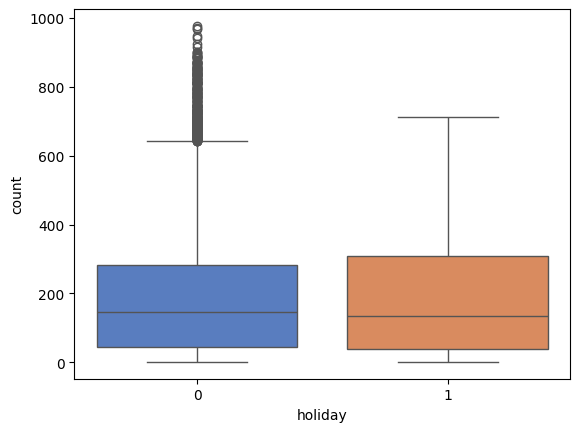

In [ ]:
sns.boxplot(data = df, x = 'holiday', y = 'count',palette='muted')
plt.plot()



STEP-1 : Set up Null Hypothesis

    Null Hypothesis ( H0 ) - Holidays have no effect on the number of electric vehicles rented

    Alternate Hypothesis ( HA ) - Holidays has some effect on the number of electric vehicles rented

STEP-2 : Checking for basic assumpitons for the hypothesis

    Distribution check using QQ Plot
    Homogeneity of Variances using Levene's test

STEP-3: Define Test statistics; Distribution of T under H0.

    If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

STEP-4: Compute the p-value and fix value of alpha.

    We set our alpha to be 0.05

STEP-5: Compare p-value and alpha.

    Based on p-value, we will accept or reject H0.
        p-val > alpha : Accept H0
        p-val < alpha : Reject H0




[]

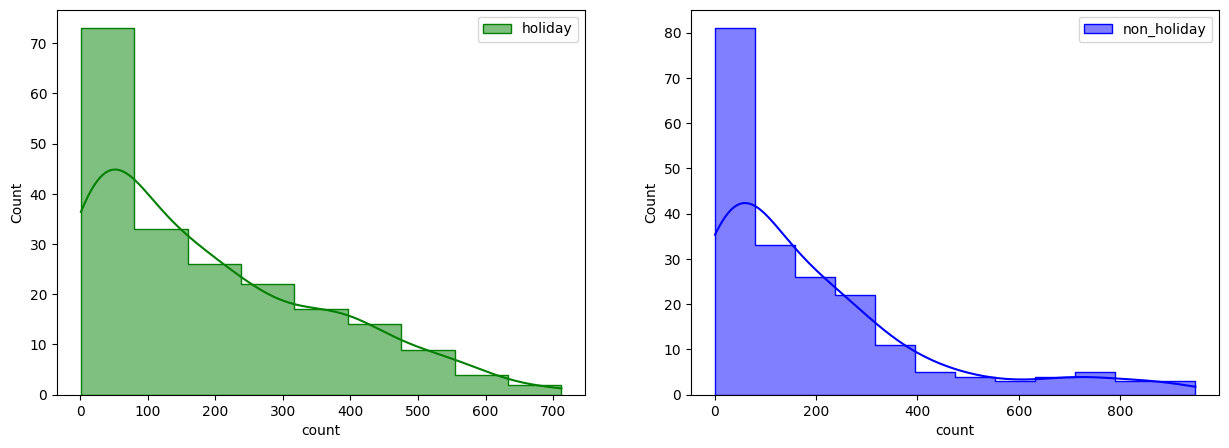

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['holiday'] == 1, 'count'].sample(200),
             element = 'step', color = 'green', kde = True, label = 'holiday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['holiday'] == 0, 'count'].sample(200),
             element = 'step', color = 'blue', kde = True, label = 'non_holiday')
plt.legend()
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.



Distribution check using QQ Plot


[]

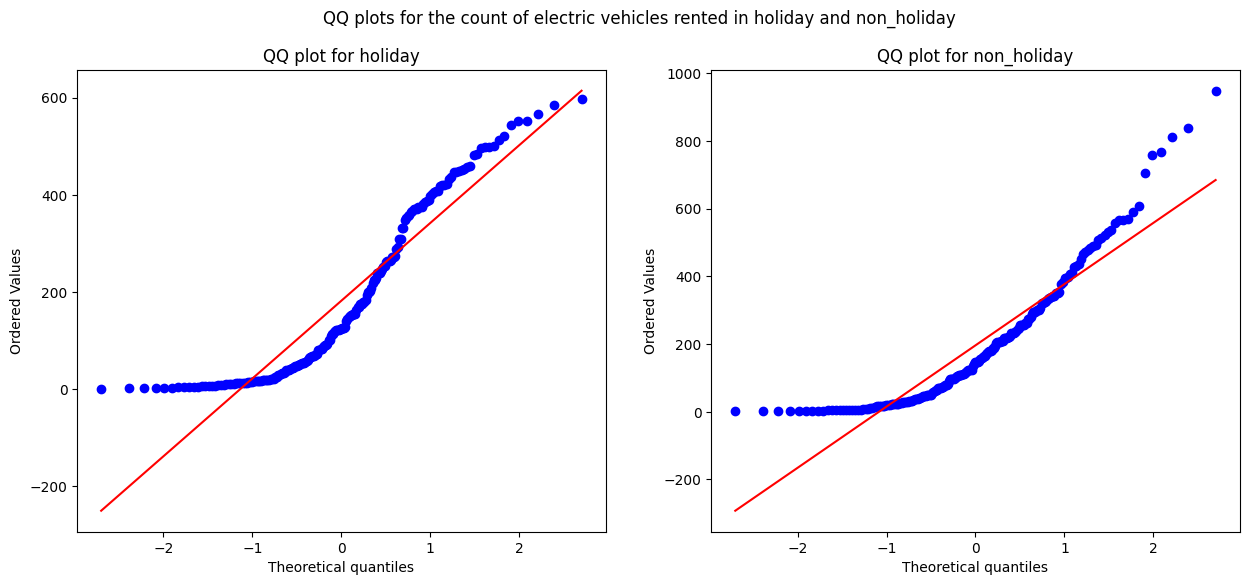

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in holiday and non_holiday')
spy.probplot(df.loc[df['holiday'] == 1, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for holiday')
plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['holiday'] == 0, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for non_holiday')
plt.plot()



    It can be inferred from the above plot that the distributions do not follow normal distribution.

It can be seen from the above plots that the samples do not come from normal distribution.

    Applying Shapiro-Wilk test for normality

H0: The sample follows normal distribution

H1: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.6728187371705125e-11
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 0, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.3191057541293034e-11
The sample does not follow normal distribution


Homogeneity of Variances using Levene's test

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.3068959635389115
The samples have Homogenous Variance 


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [ ]:
# Ho : No.of electric cycles rented is similar for holidays and non-holidays
# Ha : No.of electric cycles rented is not similar for holidays and non-holidays days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = spy.mannwhitneyu(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                      df.loc[df['holiday'] == 1, 'count'].sample(200))
print('P-value :',p_value)
if p_value < 0.05:
    print('No.of electric cycles rented is not similar for holidays and non-holidays days')
else:
    print('No.of electric cycles rented is similar for holidays and non-holidays')

P-value : 0.8173561368708354
No.of electric cycles rented is similar for holidays and non-holidays


Therefore, the number of electric cycles rented is statistically similar for both holidays and non - holidays.

Is weather dependent on the season ?

In [ ]:
df[['weather', 'season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,winter
freq,7192,2734




    It is clear from the above statistical description that both 'weather' and 'season' features are categorical in nature.





STEP-1 : Set up Null Hypothesis

    Null Hypothesis ( H0 ) - weather is independent of season

    Alternate Hypothesis ( HA ) - weather is dependent of seasons.

STEP-2: Define Test statistics

Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.

STEP-3: Checking for basic assumptons for the hypothesis (Non-Parametric Test)

    The data in the cells should be frequencies, or counts of cases.
    The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
    There are 2 variables, and both are measured as categories.
    The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one (3).

STEP-4: Compute the p-value and fix value of alpha.

we will be computing the chi square-test p-value using the chi2_contingency function using scipy.stats. We set our alpha to be 0.05

STEP-5: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

    p-val > alpha : Accept H0
    p-val < alpha : Reject H0

The Chi-square statistic is a non-parametric (distribution free) tool designed to analyze group differences when the dependent variable is measured at a nominal level. Like all non-parametric statistics, the Chi-square is robust with respect to the distribution of the data. Specifically, it does not require equality of variances among the study groups or homoscedasticity in the data.


In [ ]:
# First, finding the contingency table such that each value is the total number of total bikes rented
  # for a particular season and weather
cross_table = pd.crosstab(index = df['season'],
                          columns = df['weather'],
                          values = df['count'],
                          aggfunc = np.sum).replace(np.nan, 0)
cross_table

weather,1,2,3,4
season,,,,
fall,470116,139386,31160,0
spring,223009,76406,12919,164
summer,426350,134177,27755,0
winter,356588,157191,30255,0


Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.

In [ ]:
cross_table = pd.crosstab(index = df['season'],
                          columns = df.loc[df['weather'] != 4, 'weather'],
                          values = df['count'],
                          aggfunc = np.sum).to_numpy()[:, :3]
cross_table

array([[470116, 139386,  31160],
       [223009,  76406,  12919],
       [426350, 134177,  27755],
       [356588, 157191,  30255]])

In [ ]:
chi_test_stat, p_value, dof, expected = spy.chi2_contingency(observed = cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)

Test Statistic = 10838.372332480214
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[453484.88557396 155812.72247031  31364.39195574]
 [221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [385087.91880639 132312.23118651  26633.8500071 ]]


In [ ]:
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis



Therefore, there is statistically significant dependency of weather and season based on the number of number of bikes rented.



Is the number of cycles rented is similar or different in different weather ?


In [ ]:
df.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


[]

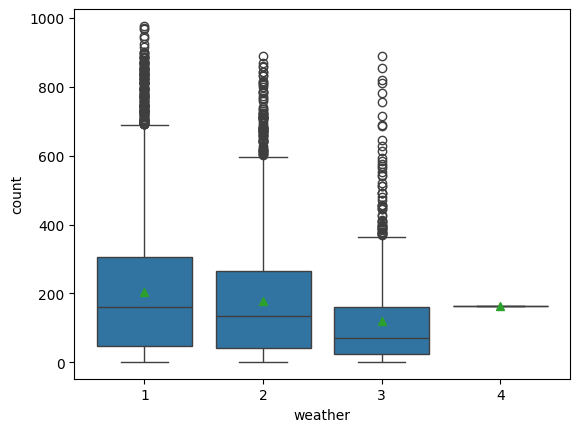

In [ ]:
sns.boxplot(data = df, x = 'weather', y = 'count', showmeans = True)
plt.plot()

In [ ]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)


(7192, 2834, 859, 1)



STEP-1 : Set up Null Hypothesis

    Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for weather 1, 2 and 3. (We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

    Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.

STEP-2 : Checking for basic assumpitons for the hypothesis

Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

Homogeneity of Variances using Levene's test

Each observations are independent.

STEP-3: Define Test statistics

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

F=MSB / MSW

Under H0, the test statistic should follow F-Distribution.

STEP-4: Decide the kind of test.

We will be performing right tailed f-test

STEP-5: Compute the p-value and fix value of alpha.

we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

STEP-6: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

    p-val > alpha : Accept H0
    p-val < alpha : Reject H0



[]

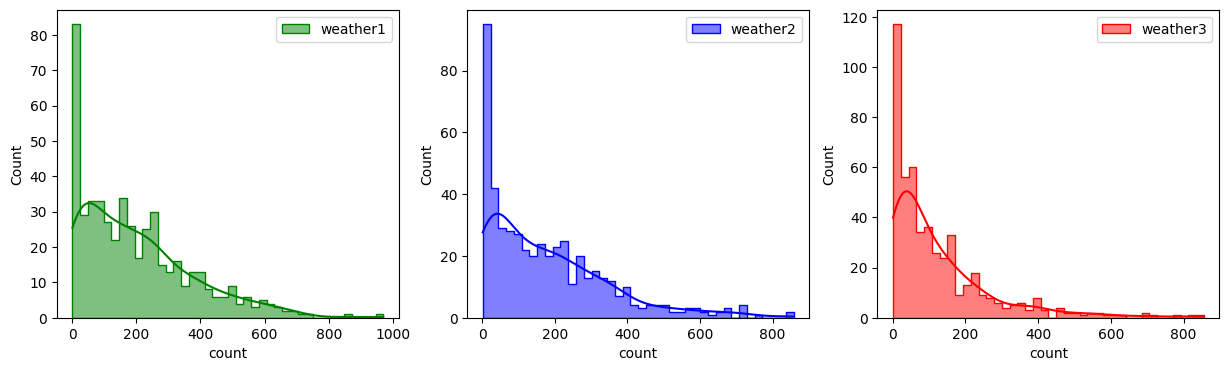

In [ ]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.



Distribution check using QQ Plot


[]

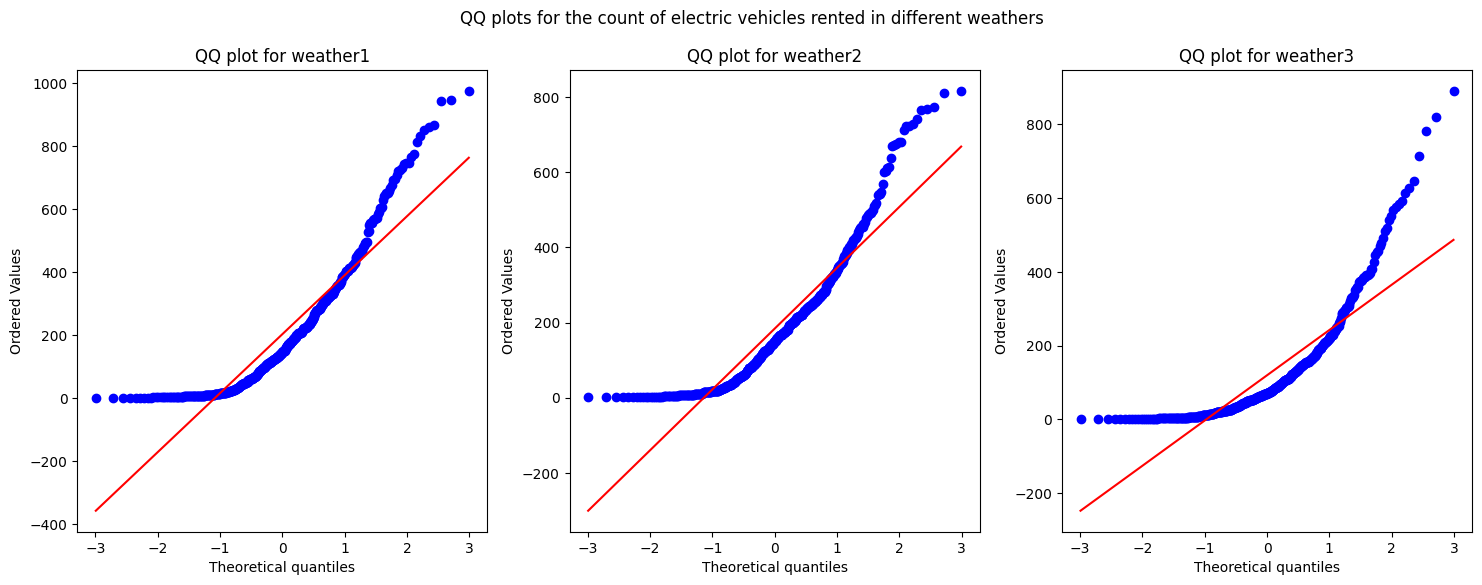

In [ ]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')
spy.probplot(df_weather1.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather1')
plt.subplot(1, 3, 2)
spy.probplot(df_weather2.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather2')
plt.subplot(1, 3, 3)
spy.probplot(df_weather3.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather3')
plt.plot()



    It can be inferred from the above plot that the distributions do not follow normal distribution.

It can be seen from the above plots that the samples do not come from normal distribution.

    Applying Shapiro-Wilk test for normality

: The sample follows normal distribution

: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
test_stat, p_value = spy.shapiro(df_weather1.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.65690073767367e-18
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_weather2.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.82972733179379e-21
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.213874418863623e-26
The sample does not follow normal distribution




Homogeneity of Variances using Levene's test


In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.9954737877625473e-11
The samples do not have  Homogenous Variance



Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.




Is the number of cycles rented is similar or different in different season ?


In [ ]:
df.groupby(by = 'season')['count'].describe()


,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [ ]:
df_season_spring = df.loc[df['season'] == 'spring', 'count']
df_season_summer = df.loc[df['season'] == 'summer', 'count']
df_season_fall = df.loc[df['season'] == 'fall', 'count']
df_season_winter = df.loc[df['season'] == 'winter', 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)

[]

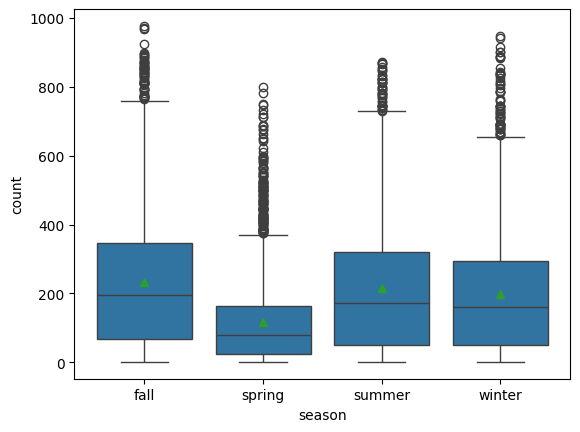

In [ ]:
sns.boxplot(data = df, x = 'season', y = 'count', showmeans = True)
plt.plot()



STEP-1 : Set up Null Hypothesis

    Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for season 1,2,3 and 4.

    Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is different for season 1,2,3 and 4.

STEP-2 : Checking for basic assumpitons for the hypothesis

    Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

    Homogeneity of Variances using Levene's test

    Each observations are independent.

STEP-3: Define Test statistics

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

F=MSB/MSW

Under H0, the test statistic should follow F-Distribution.

STEP-4: Decide the kind of test.

We will be performing right tailed f-test

STEP-5: Compute the p-value and fix value of alpha.

we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

STEP-6: Compare p-value and alpha.

Based on p-value, we will accept or reject H0. p-val > alpha : Accept H0 p-val < alpha : Reject H0

The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other.

Specifically, it tests the null hypothesis (H0):

µ1 = µ2 = µ3 = ..... = µk

where, µ = group mean and k = number of groups.

If, however, the one-way ANOVA returns a statistically significant result, we accept the alternative hypothesis (HA), which is that there are at least two group means that are statistically significantly different from each other.


[]

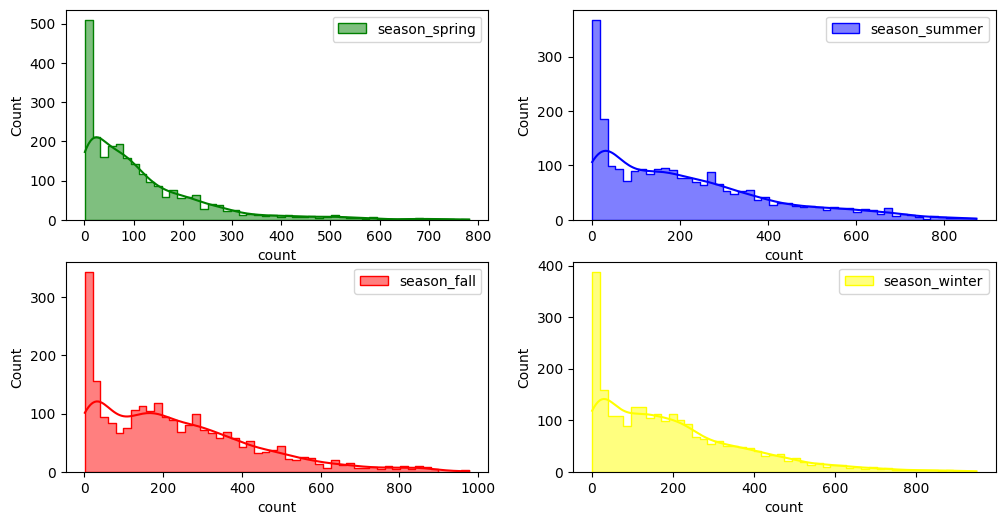

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2500), bins = 50,
             element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2500), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.

[]

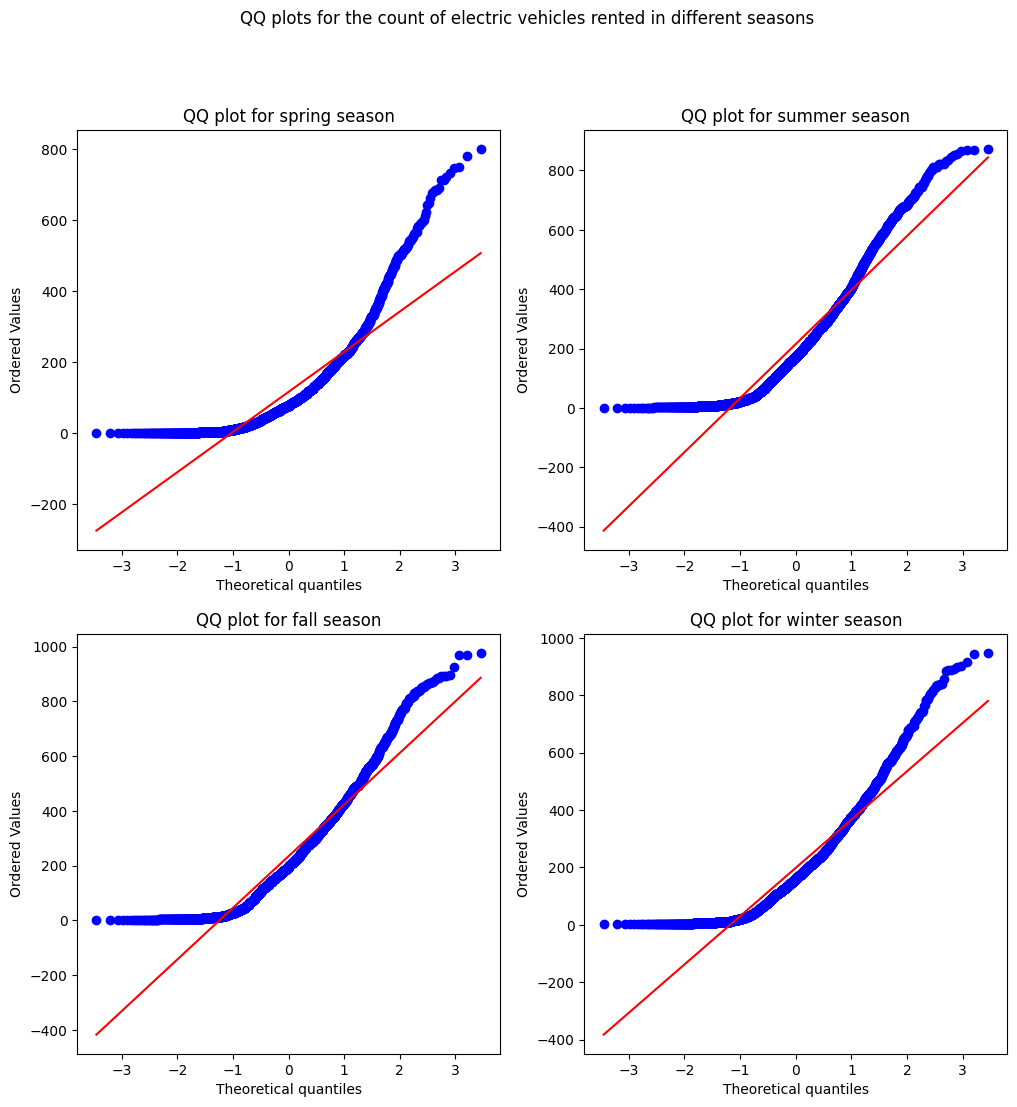

In [ ]:
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')
spy.probplot(df_season_spring.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')

plt.subplot(2, 2, 2)
spy.probplot(df_season_summer.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')

plt.subplot(2, 2, 3)
spy.probplot(df_season_fall.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')

plt.subplot(2, 2, 4)
spy.probplot(df_season_winter.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')
plt.plot()



    It can be inferred from the above plots that the distributions do not follow normal distribution.

It can be seen from the above plots that the samples do not come from normal distribution.

    Applying Shapiro-Wilk test for normality

H0: The sample follows normal distribution

H1: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
test_stat, p_value = spy.shapiro(df_season_spring.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')


p-value 0.0
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_season_summer.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.058885750166419e-38
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_season_fall.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.674272893980669e-35
The sample does not follow normal distribution


In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_season_spring.sample(2500),
                                df_season_summer.sample(2500),
                                df_season_fall.sample(2500),
                                df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.0552144858061254e-111
The samples do not have  Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.


In [ ]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151


In [ ]:
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


Therefore, the average number of rental bikes is statistically different for different seasons.

[]

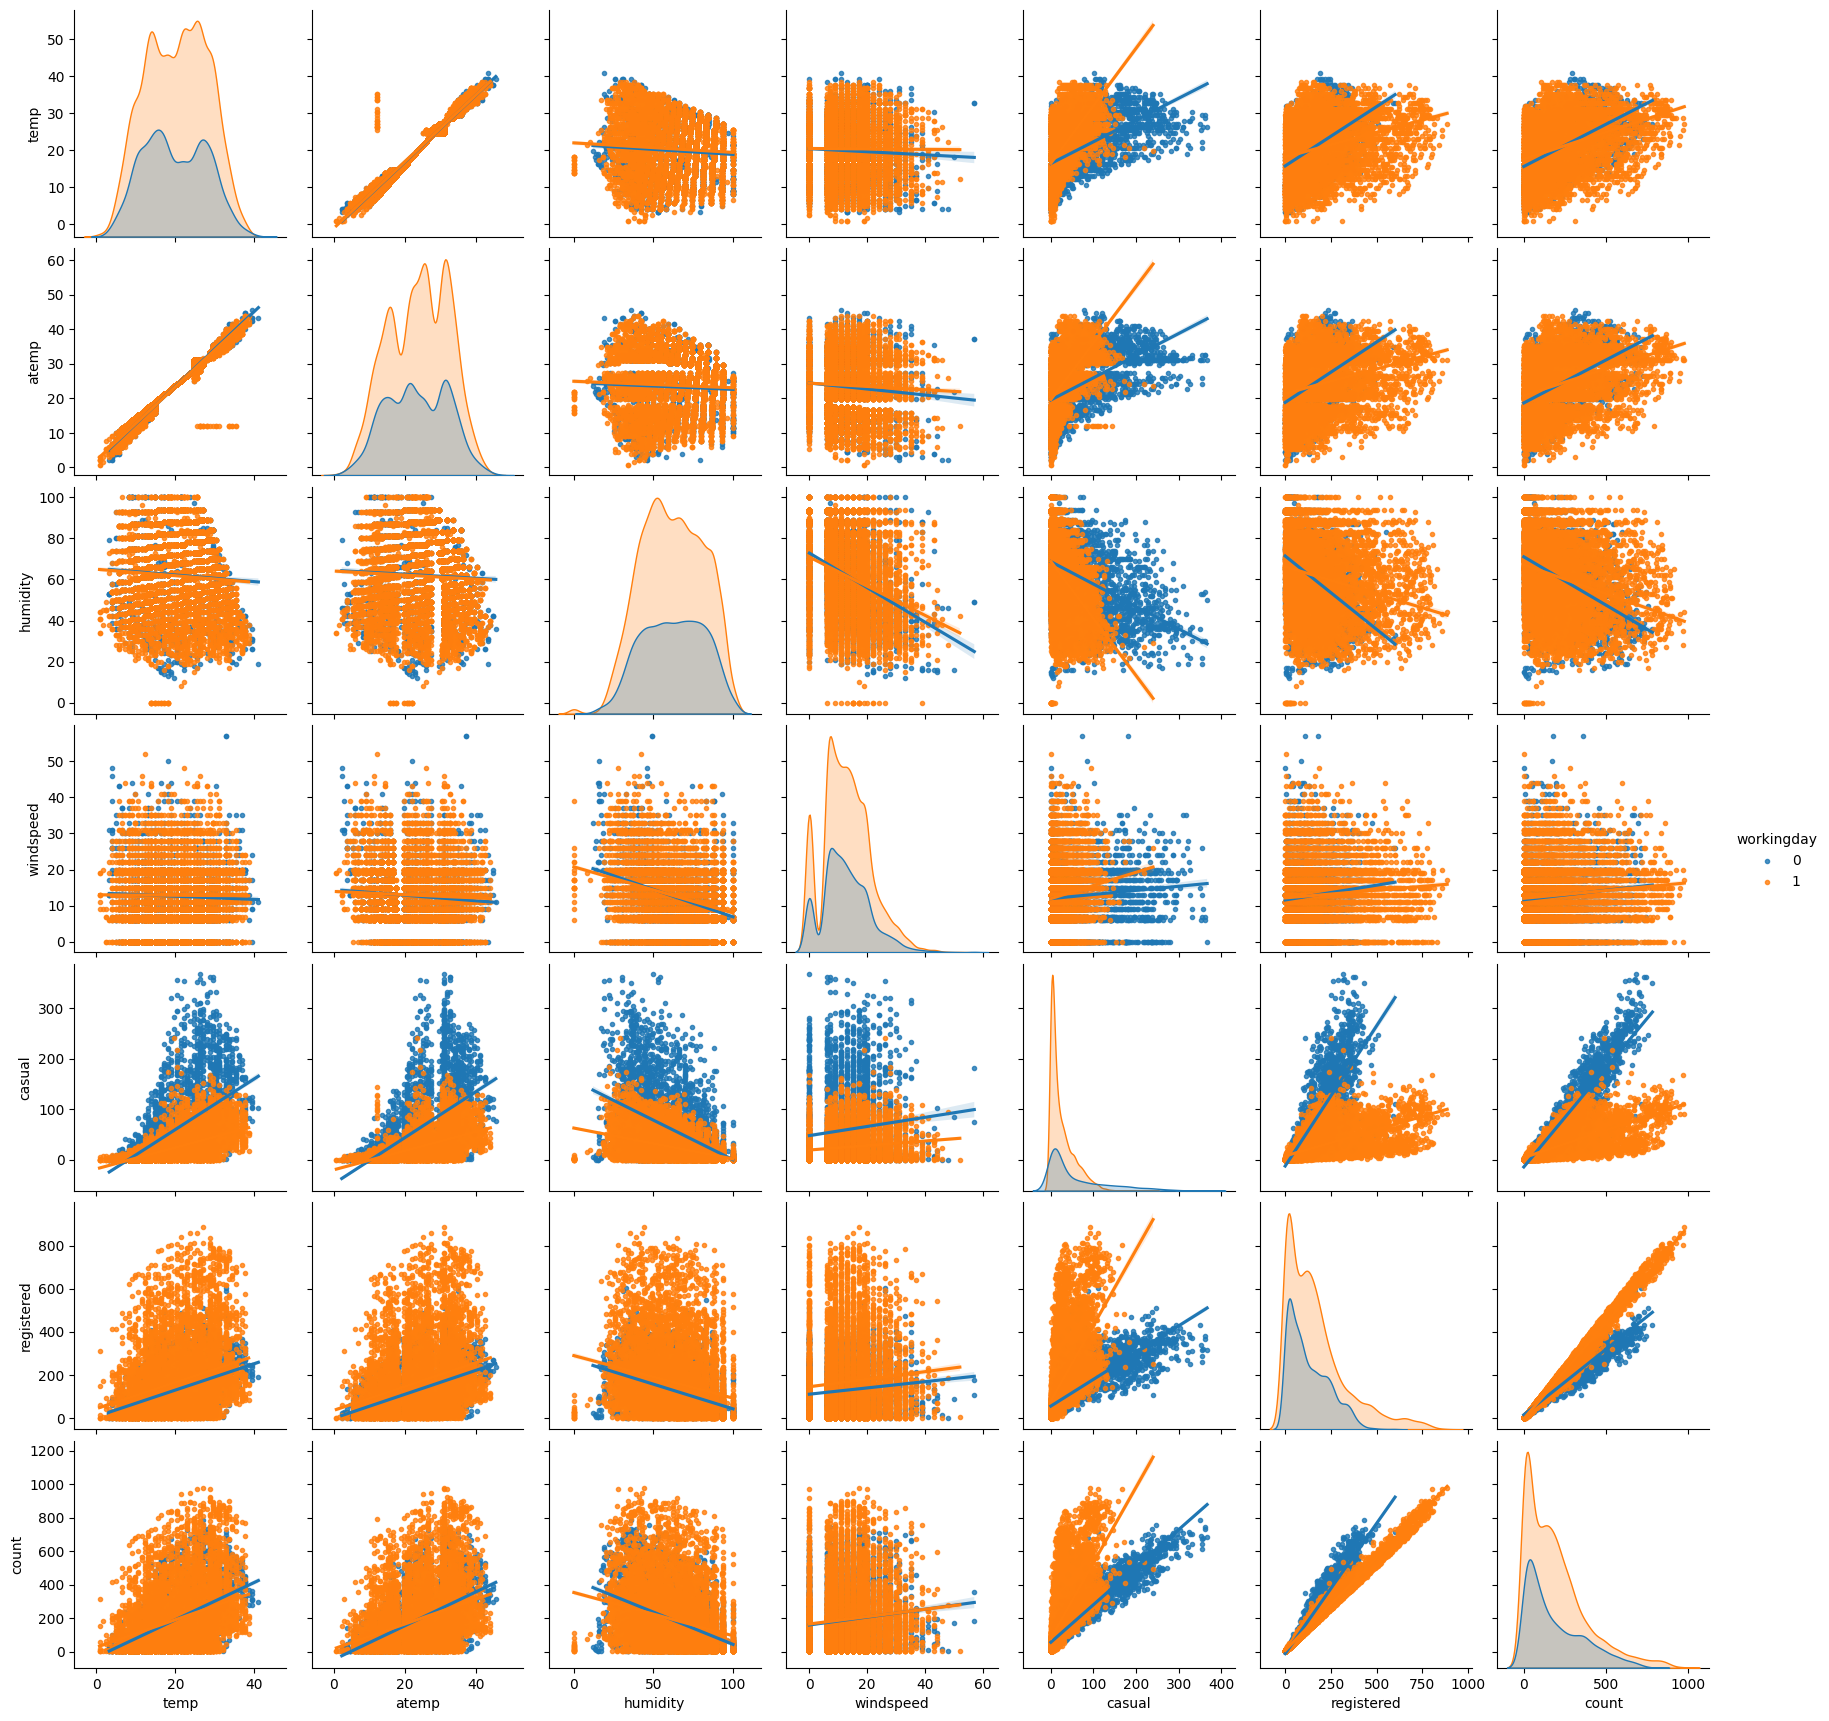

In [ ]:
sns.pairplot(data = df,
             kind = 'reg',
             hue = 'workingday',
             markers = '.')
plt.plot()

In [ ]:
!jupyter nbconvert --to html /content/Yulu.ipynb

[NbConvertApp] Converting notebook /content/Yulu.ipynb to html
[NbConvertApp] Writing 3555336 bytes to /content/Yulu.html


Insights :

    More than 80 % of the time, the temperature is less than 28 degrees celcius.
    More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.
    More than 85 % of the total, windspeed data has a value of less than 20.
    The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.
    The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.
    There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.
    The hourly total number of rental bikes is statistically different for different weathers.
    There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.
    The hourly total number of rental bikes is statistically different for different seasons.

        Recommendations:

    User Segmentation: Tailor marketing and communication strategies based on user segmentation. Provide loyalty programs and exclusive offers for registered users, while focusing on seamless rental experiences for casual users.
    Optimize Inventory: Analyze demand patterns and adjust inventory levels accordingly. Optimize inventory during low-demand months and ensure sufficient bikes are available during peak periods to meet demand.
    Improve Weather Data Collection: Enhance data collection for extreme weather conditions to better understand customer behavior. This can help in offering specialized bike models or safety measures during adverse weather.
    Seasonal Bike Maintenance: Allocate resources for seasonal bike maintenance, ensuring bikes are in top condition before peak seasons. Regular maintenance throughout the year can prevent breakdowns and enhance customer satisfaction.
    Customer Feedback and Reviews: Encourage feedback and reviews to identify areas for improvement and tailor services to meet customer expectations better. This helps in understanding preferences and maintaining high service standards.
    Time-based Pricing: Implement time-based pricing to encourage rentals during off-peak hours. Lower rates during less busy times can optimize resource usage and balance demand.